# Дипломная работа по курсу «Python для анализа данных»

1.Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

## 1.Загрузить файл hr.csv.

In [197]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_profiling import ProfileReport
from scipy import stats as s


In [198]:
url="HR.csv"
data=pd.read_csv(url)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2 Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение). 

In [199]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [200]:
#Возможно воспользоваться библиотекой pandas_profiling
profile = ProfileReport(data)
profile

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,10
Number of observations,14999
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,80.0 B
Numeric,5
Categorical,2
Boolean,3
Date,0
Text (Unique),0
Rejected,0


In [378]:
#или написать функцию для вычисления характеристик
def basic_statistics (stat):
    middle_stat=stat.mean()
    min_stat=min(stat)
    max_stat=max(stat)
    median_stat=statistics.median(stat)
    try:
        moda_stat= statistics.mode(stat)
    except ValueError:
        moda_stat= 'no unique mode'
    mid_dev_stat=statistics.pstdev(stat)
    return print(f'основные статистики: \n среднее значение  {middle_stat} \n минимум {min_stat}\
    \n максимум {max_stat} \n медиана {median_stat} \n мода {moda_stat}\
    \n сред. отклонение {mid_dev_stat}') 

In [379]:
basic_statistics(data.satisfaction_level)

основные статистики: 
 среднее значение  0.6128335222348166 
 минимум 0.09    
 максимум 1.0 
 медиана 0.64 
 мода 0.1    
 сред. отклонение 0.2486223626820733


In [380]:
basic_statistics(data.last_evaluation)

основные статистики: 
 среднее значение  0.7161017401159978 
 минимум 0.36    
 максимум 1.0 
 медиана 0.72 
 мода 0.55    
 сред. отклонение 0.1711634045107436


In [381]:
basic_statistics(data.number_project)

основные статистики: 
 среднее значение  3.80305353690246 
 минимум 2    
 максимум 7 
 медиана 4 
 мода 4    
 сред. отклонение 1.2325512654823438


In [382]:
basic_statistics(data.average_montly_hours)

основные статистики: 
 среднее значение  201.0503366891126 
 минимум 96    
 максимум 310 
 медиана 200 
 мода no unique mode    
 сред. отклонение 49.94143446256218


In [383]:
basic_statistics(data.time_spend_company)

основные статистики: 
 среднее значение  3.498233215547703 
 минимум 2    
 максимум 10 
 медиана 3 
 мода 3    
 сред. отклонение 1.4600875552715114


In [384]:
basic_statistics(data.Work_accident	)

основные статистики: 
 среднее значение  0.1446096406427095 
 минимум 0    
 максимум 1 
 медиана 0 
 мода 0    
 сред. отклонение 0.3517068274513532


In [385]:
basic_statistics(data.left)

основные статистики: 
 среднее значение  0.2380825388359224 
 минимум 0    
 максимум 1 
 медиана 0 
 мода 0    
 сред. отклонение 0.42590990072709495


In [386]:
basic_statistics(data.promotion_last_5years)

основные статистики: 
 среднее значение  0.021268084538969265 
 минимум 0    
 максимум 1 
 медиана 0 
 мода 0    
 сред. отклонение 0.14427665479561314


## 3.Рассчитать и визуализировать корреляционную матрицу для переменных. 

In [214]:
#корреляционная матрица
data.corr().style.background_gradient(cmap='PiYG').set_precision(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1,0.11,-0.14,-0.02,-0.1,0.059,-0.39,0.026
last_evaluation,0.11,1,0.35,0.34,0.13,-0.0071,0.0066,-0.0087
number_project,-0.14,0.35,1,0.42,0.2,-0.0047,0.024,-0.0061
average_montly_hours,-0.02,0.34,0.42,1,0.13,-0.01,0.071,-0.0035
time_spend_company,-0.1,0.13,0.2,0.13,1,0.0021,0.14,0.067
Work_accident,0.059,-0.0071,-0.0047,-0.01,0.0021,1,-0.15,0.039
left,-0.39,0.0066,0.024,0.071,0.14,-0.15,1,-0.062
promotion_last_5years,0.026,-0.0087,-0.0061,-0.0035,0.067,0.039,-0.062,1


## 4.Визуализировать несколько взаимосвязей между переменными. 

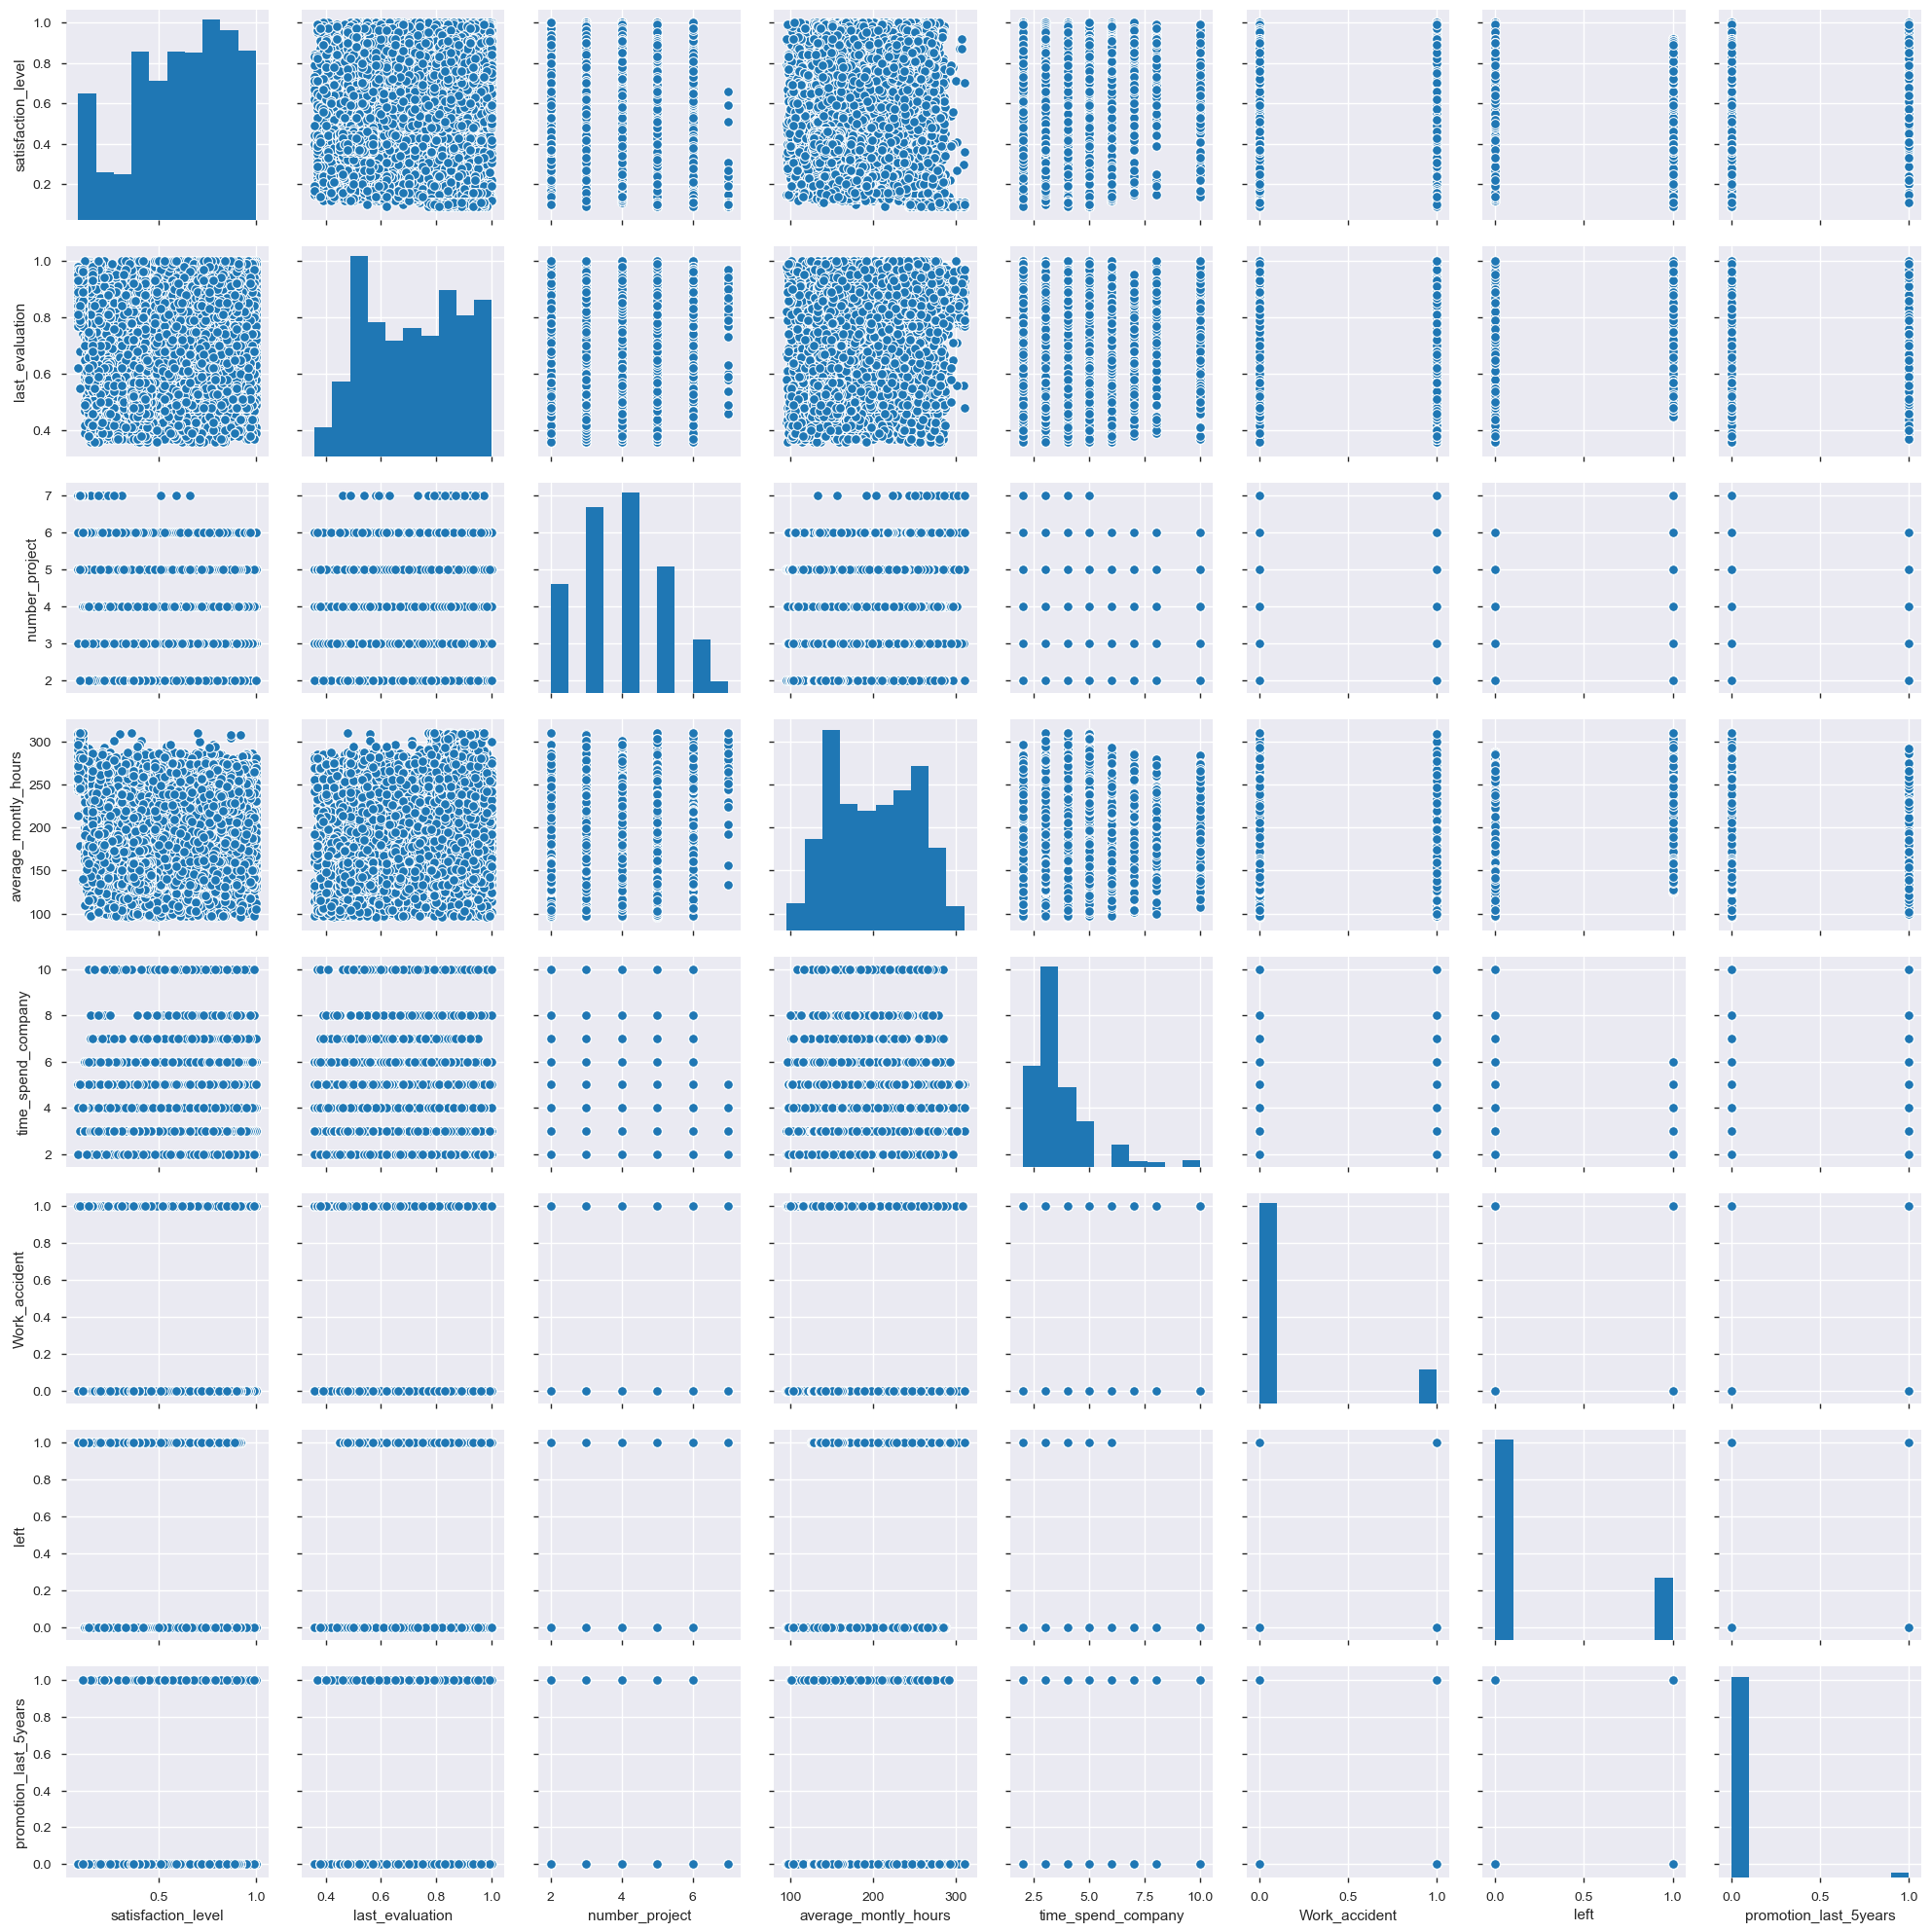

In [215]:
#визуализация через pairplot
g = sns.pairplot(data)

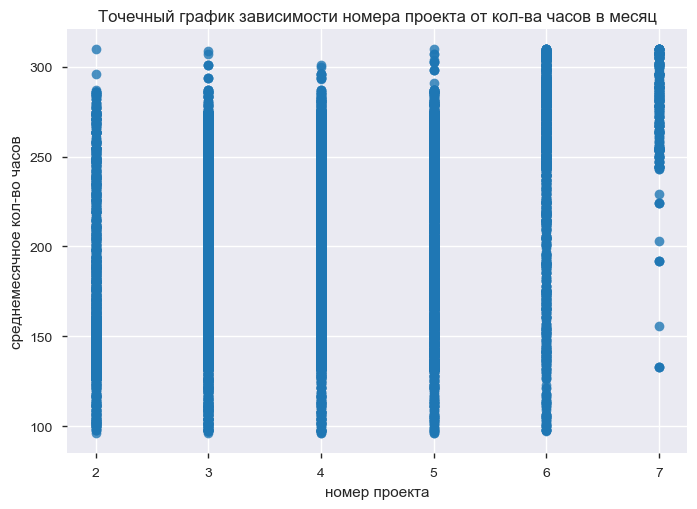

In [387]:
moda_stat= 'no unique mode'
number = data['number_project']
hours = data['average_montly_hours']
sns.regplot(x= number, y=hours, data=data, fit_reg=False)
plt.xlabel('номер проекта')
plt.ylabel('среднемесячное кол-во часов')
plt.title('Точечный график зависимости номера проекта от кол-ва часов в месяц')
plt.show()

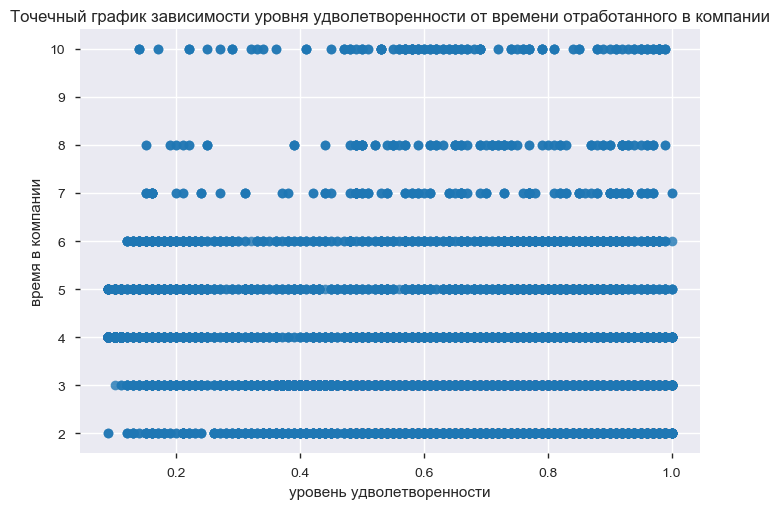

In [216]:
level = data['satisfaction_level']
time = data['time_spend_company']
sns.regplot(x= level, y=time, data=data, fit_reg=False)
plt.xlabel('уровень удволетворенности')
plt.ylabel('время в компании')
plt.title('Точечный график зависимости уровня удволетворенности от времени отработанного в компании')
plt.show()

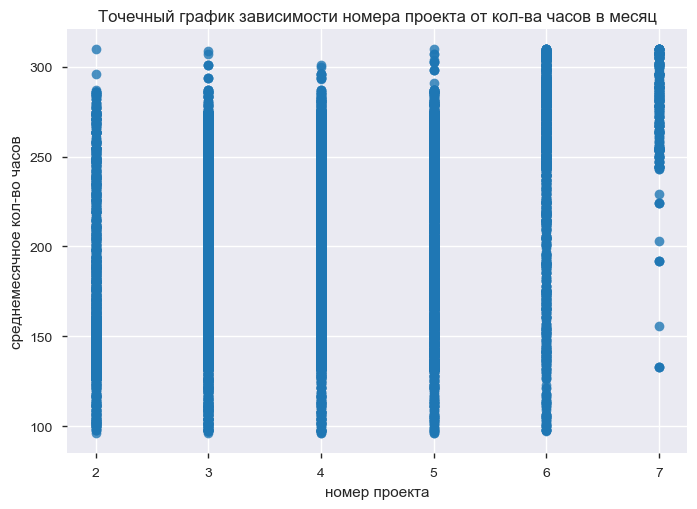

In [218]:
number = data['number_project']
hours = data['average_montly_hours']
sns.regplot(x= number, y=hours, data=data, fit_reg=False)
plt.xlabel('номер проекта')
plt.ylabel('среднемесячное кол-во часов')
plt.title('Точечный график зависимости номера проекта от кол-ва часов в месяц')
plt.show()

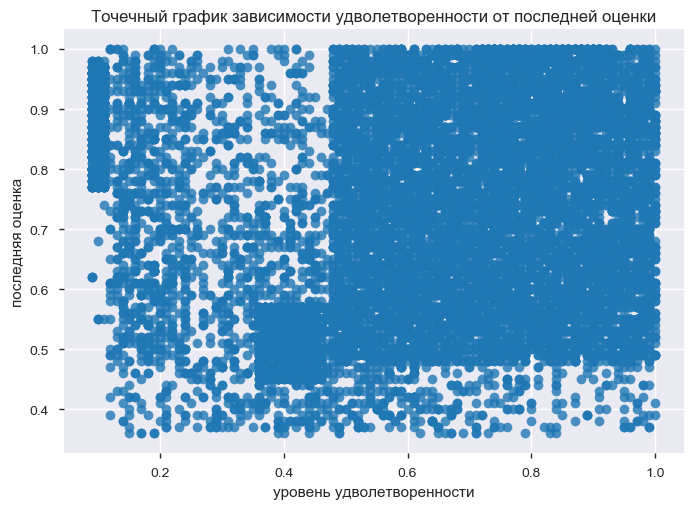

In [219]:
last = data['last_evaluation']
sns.regplot(x= level, y=last, data=data, fit_reg=False)
plt.xlabel('уровень удволетворенности')
plt.ylabel('последняя оценка')
plt.title('Точечный график зависимости удволетворенности от последней оценки')
plt.show()

## 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

### Проверка - уровень удволетворенности отдела продаж и маркетинга "идентичен"

In [223]:
sales_sat=data[data.sales=='sales']['satisfaction_level']
marketing_sat=data[data.sales=='marketing']['satisfaction_level']

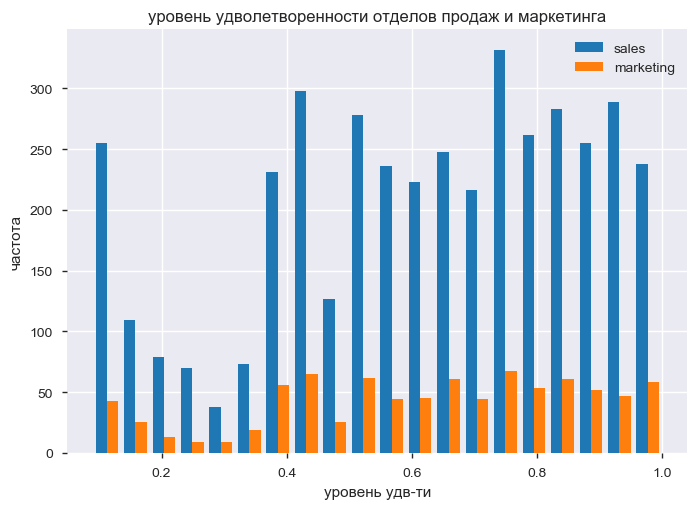

In [224]:
plt.hist([sales_sat, marketing_sat], bins = 20, label=['sales', 'marketing'])
plt.legend(loc='upper right')
plt.title('уровень удволетворенности отделов продаж и маркетинга')
plt.xlabel('уровень удв-ти')
plt.ylabel('частота')
plt.show()

In [225]:
s.shapiro(sales_sat)

ShapiroResult(statistic=0.9506646990776062, pvalue=3.175028034698379e-35)

In [226]:
s.shapiro(marketing_sat)

ShapiroResult(statistic=0.956967294216156, pvalue=3.622164451244723e-15)

In [227]:
statistics.variance(sales_sat), statistics.variance(marketing_sat)

(0.06262547313582477, 0.05967272074483276)

нет нормального распределния

In [221]:
#Проверка T критерий Стьюдента
s.ttest_ind(sales_sat, marketing_sat, equal_var=False)

Ttest_indResult(statistic=-0.4514854841846845, pvalue=0.6517175047327456)

p=0,65>0,05  следовательно мы принимает нулевую гипотезу (о том, что средние значения выборок равны), следовательно
 не имеется статистического различия между отделом продаж и маркетинга.

In [222]:
#Проверка Манна-Уитни
s.mannwhitneyu(sales_sat,marketing_sat)

MannwhitneyuResult(statistic=1768307.5, pvalue=0.4201381842481898)

данная проверка также показада P=0,4>0,05 -принимает нулевую гипотезу

### Проверка взаимосвязи  3 и 5 проектов  отдела продаж по уровню удволетворенности

In [262]:
sales_3=data[(data.number_project==3) & (data.sales=='sales')]['satisfaction_level']
sales_5=data[(data.number_project==5) & (data.sales=='sales')]['satisfaction_level']

In [263]:
len(sales_3),len(sales_5)

(1090, 755)

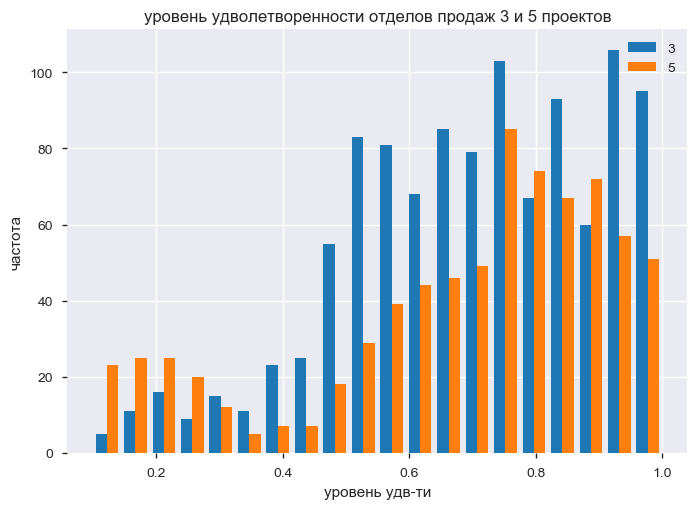

In [256]:
plt.hist([sales_3, sales_5], bins = 20, label=['3', '5'])
plt.legend(loc='upper right')
plt.title('уровень удволетворенности отделов продаж 3 и 5 проектов')
plt.xlabel('уровень удв-ти')
plt.ylabel('частота')
plt.show()

In [257]:
s.shapiro(sales_3)

ShapiroResult(statistic=0.9611736536026001, pvalue=1.9309815392512205e-16)

In [258]:
s.shapiro(sales_5)

ShapiroResult(statistic=0.898002028465271, pvalue=5.551029154826331e-22)

In [259]:
statistics.variance(sales_3), statistics.variance(sales_5)

(0.039510935880910855, 0.056122380592688884)

не нормальное распределение

In [260]:
#Проверка T критерий Стьюдента
s.ttest_ind(sales_3,sales_5, equal_var=False)

Ttest_indResult(statistic=1.8999056491646262, pvalue=0.05764611554730257)

p=0,058>0,05 следовательно мы принимает нулевую гипотезу (о том, что средние значения выборок равны), следовательно не имеется статистического различия между отделом продаж 3 и 5 проектов по уровню удв.

In [264]:
#Проверка Манна-Уитни
s.mannwhitneyu(sales_3,sales_5)

MannwhitneyuResult(statistic=410126.0, pvalue=0.45229425527221034)

данная проверка также показада P=0,45>0,05 -принимает нулевую гипотезу

### Проверка - гипотеза рабочие проводившие большее кол-во времени в компании более удволетворены

In [323]:
# ho-удволетворены одинаково
time_more3=data[data.time_spend_company>=3]['satisfaction_level']
time_max3=data[data.time_spend_company<3]['satisfaction_level']

In [324]:
s.shapiro(time_more3)

ShapiroResult(statistic=0.9499788880348206, pvalue=0.0)

In [325]:
s.shapiro(time_max3)

ShapiroResult(statistic=0.970361590385437, pvalue=2.2236650319831776e-25)

In [326]:
statistics.variance(time_more3), statistics.variance(time_max3)

(0.06685099320270856, 0.03453323972376432)

нет нормального распределения

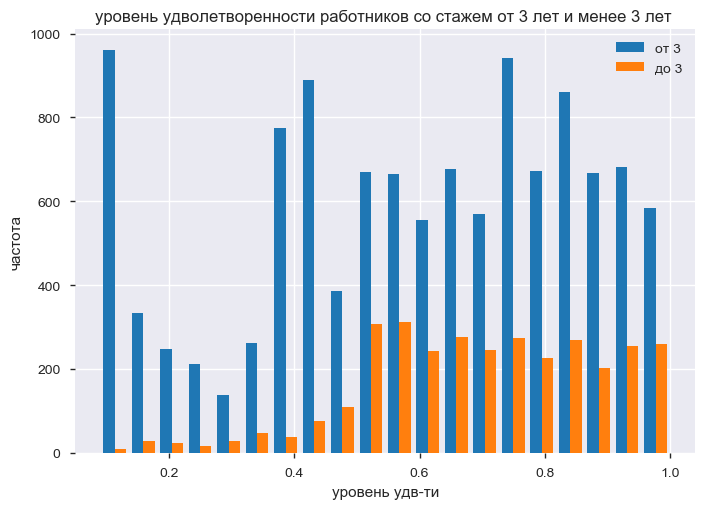

In [389]:
plt.hist([time_more6, time_max5], bins = 20, label=['от 3', 'до 3'])
plt.legend(loc='upper right')
plt.title('уровень удволетворенности работников со стажем от 3 лет и менее 3 лет ')
plt.xlabel('уровень удв-ти')
plt.ylabel('частота')
plt.show()

In [328]:
#Проверка T критерий Стьюдента
s.ttest_ind(time_more3, time_max3, equal_var=False)

Ttest_indResult(statistic=-26.59842470511051, pvalue=1.1855715014154235e-148)

p<0,05 соедовательно отвергаем нулевую гипотезу-->  имеется статистическое различие

In [329]:
s.mannwhitneyu(time_more3,time_max3)

MannwhitneyuResult(statistic=14742127.5, pvalue=1.2379266189046394e-87)

p<0,05 соедовательно отвергаем нулевую гипотезу-->  имеется статистическое различие

In [330]:
len(time_more3), len(time_max3)

(11755, 3244)

## 6.Рассчитать сколько работников работает в каждом департаменте.

In [17]:
#сколько работников работает в каждом департаменте 
data['sales'].groupby(data['sales']).count().sort_values( ascending=False)

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

## 7.Показать распределение сотрудников по зарплатам.

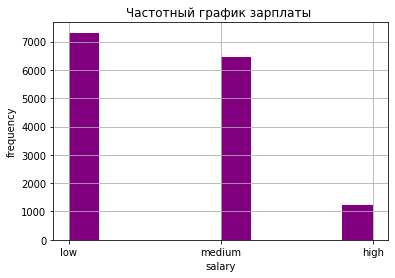

In [131]:
#распределение сотрудников по зарплатам
n, bins, patches = plt.hist(data['salary'], 10, facecolor='purple')
plt.xlabel('salary')
plt.ylabel('frequency')
plt.title('Частотный график зарплаты ')
plt.grid(True)
plt.show()


## 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [125]:
f=data.pivot_table(index='sales', columns='salary',  aggfunc='size', fill_value=0)
f

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


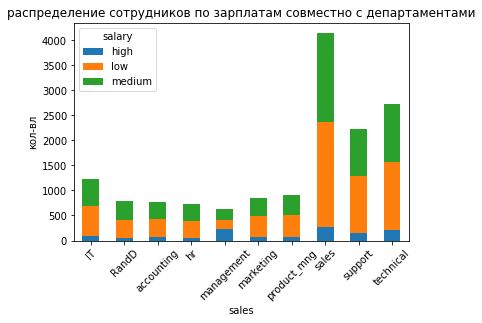

In [128]:
f.plot(kind='bar', rot=45, stacked=True)
plt.title('распределение сотрудников по зарплатам совместно с департаментами')
plt.ylabel('кол-вл')
plt.show()

## 9.Сколько сотрудников покинули компанию. 

In [8]:
# 9.Сколько сотрудников покинули компанию.
data[data.left==1].left.count()

3571

In [10]:
len(data[data.left==1].left)

3571

## 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

### Гипотеза №1  -уровень  зарплаты влияет на "увольнение"

In [141]:
g1=data.pivot_table(index='left', columns='salary',  aggfunc='size', fill_value=0)
g1

salary,high,low,medium
left,,,
0,1155,5144,5129
1,82,2172,1317


In [144]:
# Применим хи2 квадрат Пирсона (обе переменные номинативные)
import scipy
chi2, prob, df, expected = scipy.stats.chi2_contingency(g1)

In [148]:
chi2

381.2250470662106

In [150]:
prob

1.652086749296005e-83

Теоритеческое значение хи2 при степени свободы 2=(3-1)*(2-1)  при р=0,05 составляет 5,991 и при р=0,01 - 9,210

381>9,210
Следовательно уровень зарплата влияет на увольнение работников.

### Гипотеза №2 - несчатсный случай влияет на увольнение работников

In [185]:
g2=data.pivot_table(index='left', columns='Work_accident',  aggfunc='size', fill_value=0)
g2

Work_accident,0,1
left,,
0,9428,2000
1,3402,169


In [188]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(g2)

In [153]:
chi2

357.5623604097228

In [154]:
prob

9.55823958002199e-80

Теоритеческое значение хи2 при степени свободы 1=(2-1)*(2-1)  при р=0,05 составляет 3,841 и при р=0,01 - 6,635.

358>6,6 и p=9,6e-80<0,01
Следовательно несчатный случай на работе влияет на увольнение работников.

### Гипотеза №3-отсутствие повышений за 5 лет -влияет на увольнение

In [189]:
g3=data.pivot_table(index='left', columns='promotion_last_5years',  aggfunc='size', fill_value=0)
g3


promotion_last_5years,0,1
left,,
0,11128,300
1,3552,19


In [169]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(g3)

In [170]:
chi2

56.26162726484021

In [171]:
prob

6.344155457918697e-14

Теоритеческое значение хи2 при степени свободы 1=(2-1)*(2-1)  при р=0,05 составляет 3,841 и при р=0,01 - 6,635

56>6,6 и p=6e-14<0,01
Следовательно отсутствие/присутствие повышений влияет на увольнение работников.

### Гипотеза №4 -уровень удволетворенности влияет на увольнение

In [391]:
left_sap=data[data.left==1].satisfaction_level
notleft_sap=data[data.left==0].satisfaction_level

In [175]:
# проверим на нормальное распределение
s.shapiro(left_sap),s.shapiro(notleft_sap)

(ShapiroResult(statistic=0.8881876468658447, pvalue=4.203895392974451e-45),
 ShapiroResult(statistic=0.9537106156349182, pvalue=0.0))

In [176]:
statistics.variance(left_sap), statistics.variance(notleft_sap)

(0.06966085873834273, 0.047134040226558455)

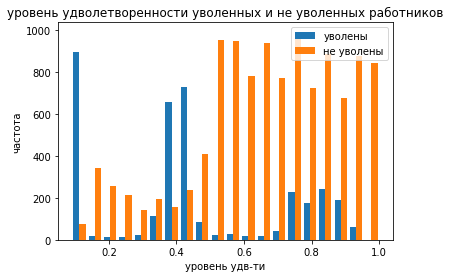

In [177]:
plt.hist([left_sap, notleft_sap], bins = 20, label=['уволены', 'не уволены'])
plt.legend(loc='upper right')
plt.title('уровень удволетворенности уволенных и не уволенных работников')
plt.xlabel('уровень удв-ти')
plt.ylabel('частота')
plt.show()

In [192]:
# распределение не нормальное,применим U критерий Манна уитни
s.mannwhitneyu(left_sap, notleft_sap)

MannwhitneyuResult(statistic=10286473.0, pvalue=0.0)

P=0<0,05 следовательно отвергаем нулевую гипотезу. 
Наблюдается статистическое различие между уволенными
и не уволенными сотрудниками по показателю уровня удволетворенности.

In [196]:
left_sap.mean(), notleft_sap.mean()

(0.44009801176140917, 0.666809590479516)

In [390]:
#Проверка T критерий Стьюдента
s.ttest_ind(left_sap, notleft_sap, equal_var=False)

Ttest_indResult(statistic=-46.63641435277572, pvalue=0.0)

P=0<0,05 следовательно отвергаем нулевую гипотезу. Наблюдается статистическое различие между уволенными и не уволенными сотрудниками по показателю уровня удволетворенности.

11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете